# Veri yükleme ve Gözlemleme

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("trspam.csv", sep=';')

In [5]:
df.head(10)

,Message,Group,GroupText
0,125 lira,2,Normal
1,Baskanin aksam toplantısi fenaymis :),2,Normal
2,Bilal yalçnlara ne zaman gidiyoruz?,2,Normal
3,"BiP ile mesajlarimi aninda, daha eglenceli gon...",1,Spam
4,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR...,1,Spam
5,İyi ya dokuz eylül iyidir arş.gör falan kovala ;),2,Normal
6,İyiyim teşekkürler oturuyoruz nazarda arkadaşl...,2,Normal
7,Kapatamıyorun ayarlara girmem lazım :),2,Normal
8,Menüye girsem görünür mü acaba ??,2,Normal
9,Önemli değil hocam iyi akşamlar ;),2,Normal


# 1 :  Spam ,  2 : Normal

In [6]:
df = df.drop(columns = "GroupText", axis = 1)

In [7]:
df.head(5)

,Message,Group
0,125 lira,2
1,Baskanin aksam toplantısi fenaymis :),2
2,Bilal yalçnlara ne zaman gidiyoruz?,2
3,"BiP ile mesajlarimi aninda, daha eglenceli gon...",1
4,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  4751 non-null   object
 1   Group    4751 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 74.4+ KB


In [9]:
df.shape

(4751, 2)

# Eksik veri var mı bakalım

In [10]:
print(df.isnull().sum())

Message    0
Group      0
dtype: int64


# Eksik verimiz yok şimdi bir de dağılım görselleştirelim

Group
1    2536
2    2215
Name: count, dtype: int64


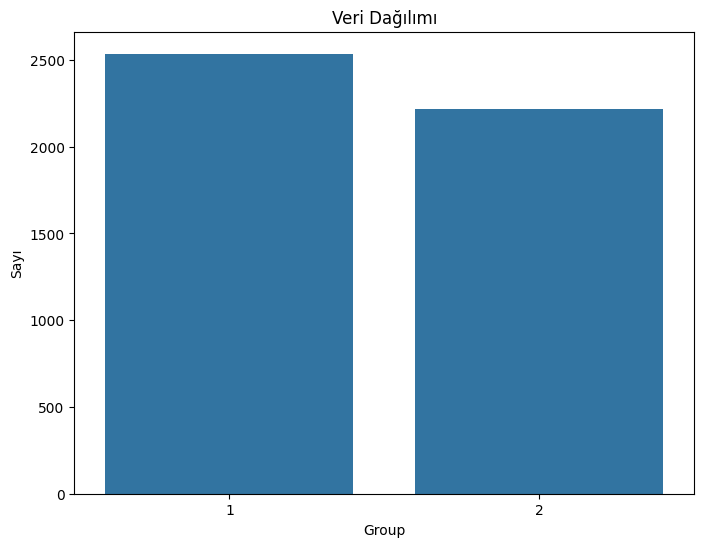

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df["Group"].value_counts())

#Veri dağılımını görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(x="Group", data=df)
plt.title("Veri Dağılımı")
plt.xlabel("Group")
plt.ylabel("Sayı")
plt.show()

###Veri seti dengeli duruyor


# Metin Temizleme

### Önce tüm harfleri küçük harfe çeviriyoruz

In [12]:
df["Message"] = df["Message"].str.lower()

In [13]:
df.head(5)

,Message,Group
0,125 lira,2
1,baskanin aksam toplantısi fenaymis :),2
2,bilal yalçnlara ne zaman gidiyoruz?,2
3,"bip ile mesajlarimi aninda, daha eglenceli gon...",1
4,digiturkten firsat! size ozel yil sonuna kadar...,1


### Daha sonra noktalama işaretlerini kaldıracağız

In [14]:
print(df.columns)

Index(['Message', 'Group'], dtype='object')


In [15]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [16]:
import string
df["Message"] = df["Message"].str.translate(str.maketrans('', '', string.punctuation))

In [17]:
df.head(3)

,Message,Group
0,125 lira,2
1,baskanin aksam toplantısi fenaymis,2
2,bilal yalçnlara ne zaman gidiyoruz,2


### şimdi varsa fazlalık boşlukları kaldıracağız

In [18]:
df["Message"] = df["Message"].str.replace('\s+', ' ', regex=True)

In [19]:
df.head(5)

,Message,Group
0,125 lira,2
1,baskanin aksam toplantısi fenaymis,2
2,bilal yalçnlara ne zaman gidiyoruz,2
3,bip ile mesajlarimi aninda daha eglenceli gond...,1
4,digiturkten firsat size ozel yil sonuna kadar ...,1


# **STOPWORDS TEMİZLEME**

### Her dilde stopwords farklı biz Türkçe çalışıyoruz bu yüzden Türkçe stopwordsleri bir yükleyelim

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
turkce_stopwords = set(stopwords.words('turkish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### şimdi stopwrodsleri temizleyelim

In [21]:

df["Message"] = df["Message"].apply(lambda x : ' '.join([
    word for word in x.split()
    if word not in turkce_stopwords
]))

In [22]:
df.head(10)

,Message,Group
0,125 lira,2
1,baskanin aksam toplantısi fenaymis,2
2,bilal yalçnlara zaman gidiyoruz,2
3,bip mesajlarimi aninda eglenceli gonderiyorum ...,1
4,digiturkten firsat size ozel yil sonuna kadar ...,1
5,i̇yi dokuz eylül iyidir arşgör falan kovala,2
6,i̇yiyim teşekkürler oturuyoruz nazarda arkadaş...,2
7,kapatamıyorun ayarlara girmem lazım,2
8,menüye girsem görünür,2
9,önemli değil hocam iyi akşamlar,2


# Bu temizlenmiş metinlerle bir WordCloud oluşturarak metindeki en yaygın kelimeleri görselleştirebiliriz.

In [23]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


### Kelime bulutu oluşturabilmek için tüm metinleri birleştirip tek bir büyük metin haline getirmemiz gerekiyor

In [25]:
#temizlenmiş veri:
cleaned_text = ' '.join(df["Message"])

In [26]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# WordCloud'u çizdirelim şimdi ☁️

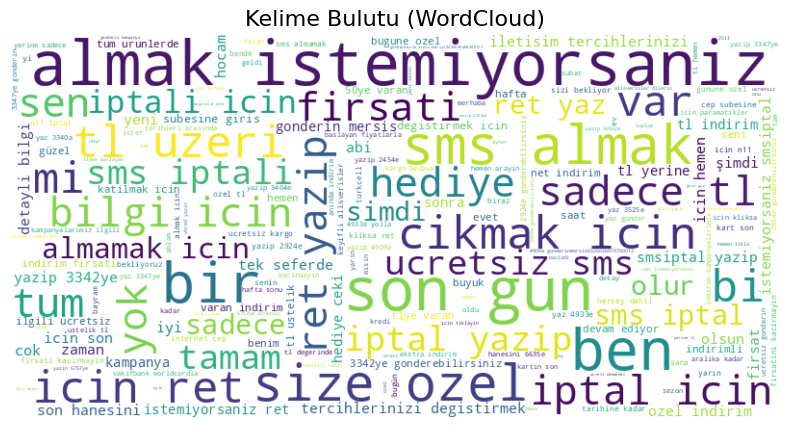

In [27]:
plt.figure(figsize =(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Kelime Bulutu (WordCloud)", fontsize = 16)
plt.show()

# Şimdi Model Seçip Uygulayacağız

## Lojistik Regresyon Kullanıyorum

In [28]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

### Veriyi ayıralım X ve y olarak sonra test split yapacağız

In [29]:
X = df["Message"]
y= df["Group"]

X_train, X_test , y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)

### Metinler string olduğu için bu şekilde modelimize veremeyiz sayısal hale getirmemiz gerek

# **TF-IDF**

In [30]:
#TF-IDF ile metinleri sayısal hale çevireceğim

tfidf = TfidfVectorizer(max_features=5000) #en sık geçen 5000 kelime
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Modeli Eğitelim

In [31]:
#Lojistik Regresyon
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

# Tahmin

In [32]:
y_pred = model.predict(X_test_tfidf)

#Performans ölçelim
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

#Conf Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

#ROC-AUC


Accuracy: 0.9810725552050473
Confusion Matrix:
[[515  14]
 [  4 418]]
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       529
           2       0.97      0.99      0.98       422

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



# Son olarak veri setinde olmayan birkaç cümleyi test edelim

In [33]:
texts=  ["Bu ayakkabıda indirim varmış alalım mı ?", "Bu mesajı göremiyorsanız linke tıklayın"]

texts_tfidf = tfidf.transform(texts)
predictions = model.predict(texts_tfidf)

#tahmin sonuçları
for message, prediction in zip(texts, predictions):
    if prediction == 1:
        print(f"'{message}' : Spam")
    else:
        print(f"'{message}' : Normal")

'Bu ayakkabıda indirim varmış alalım mı ?' : Spam
'Bu mesajı göremiyorsanız linke tıklayın' : Normal


# Bu sonuçlar beni çok şaşırttı hem de bu kadar yüksek skor almamıza rağmen, sebep olarak :
* "indirim" gibi spam mesajlarda sıkça kullanılan bir kelime olduğu için model yanılmış olabilir.
* Eğitim verisinde "linke tıklayın" gibi ifadelerin yeterince sık geçmemesi olabilir.

# daha karmaşık modeller denenebilir ya da transformers modeller ile bağlam daha iyi yakalanabilir